### Simulating the PHYS 211 M&M lab

NOTE: In this notebook I use the `stats` sub-module of `scipy` for all statistics functions, including generation of random numbers. There are other modules with some overlapping functionality, e.g., the regular python random module, and the `scipy.random` module, but I do not use them here. The `stats` sub-module includes tools for a large number of distributions, it includes a large and growing set of statistical functions, and there is a unified class structure. (And namespace issues are minimized.) See https://docs.scipy.org/doc/scipy/reference/stats.html.

In [1]:
import numpy as np
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
      
# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size

#### Intro
+ 6 Colors: Yellow, Blue, Orange, Red, Green, and Blue
+ Assume 60 M&Ms in every bag
+ Assume equal probabilities (well mixed, large "reservoir")
+ Assume 24 students (bags) per section

To get started, sample one bag of M&Ms, and count the numberof brown M&Ms.<br>
Do this by generating 60 random integers from the set 0, 1, 2, 3, 4, 5, and let's say that "brown" = 0.

In [3]:
bag = stats.randint.rvs(0,6,size = 60) # or sp.random.randint(0,6,60)
print(bag)

[3 0 5 1 2 5 4 5 2 0 5 5 5 1 5 2 0 0 4 1 5 2 1 5 0 4 4 0 3 5 5 0 4 4 0 2 4
 0 3 2 2 1 5 3 1 3 2 2 2 3 1 4 5 3 3 3 1 2 1 1]


+ Count the number of each color in the bag using `np.bincount(bag)`. The first element in the array is the number of occurences of 0 in "bag," the second element is the number of occurences of 1, etc.

In [4]:
np.bincount(bag)

array([ 9, 10, 11,  9,  8, 13], dtype=int64)

+ For our "brown" = 0 choice, the number of brown M&Ms is the last element in the array returned by `bincount`, or `sp.bincount(bag)[0]`.

In [5]:
np.bincount(bag)[0]

9

+ Now sample many bags
+ Record number of brown M&Ms in each bag

In [6]:
# Long version of sampling many bags
nb = 24                     # number of bags 
data_section = np.zeros(nb) # array in for data for a lab section
for i in range(nb):
    bag = stats.randint.rvs(0,6,size=60)
    data_section[i] = np.bincount(bag)[0]

data_section

array([10., 10.,  6., 10., 14., 11.,  8., 13.,  7., 16.,  8., 12.,  9.,
       10., 13.,  9.,  9.,  8.,  6.,  7., 13.,  9., 15., 15.])

In [7]:
# Concise version of sampling many bags
nb = 24            # number of bags
data_section = np.array([np.bincount(stats.randint.rvs(0,6,size=60))[0] for i in range(nb)])
data_section

array([13, 10,  9, 12,  6, 12, 12, 13,  6,  7, 14,  8, 10,  7,  7,  9, 19,
        9,  8, 12,  6,  8,  8, 10], dtype=int64)

In [8]:
np.mean(data_section), np.std(data_section), np.std(data_section)/np.sqrt(len(data_section)-1)

(9.791666666666666, 3.0547663122114956, 0.6369628076720711)

#### Answer for  results from this single lab section:<br>
$\overline N = 9.8 \pm 0.6$

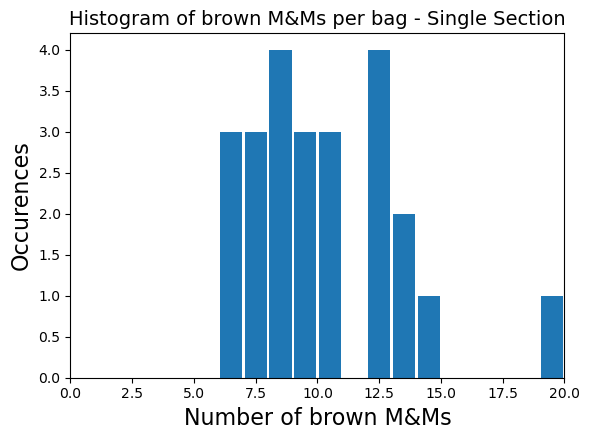

In [9]:
plt.figure()
nbins = 20
low = 0
high = 20
plt.hist(data_section,nbins,[low,high],rwidth = 0.9)
plt.xlim(0,20)
plt.title("Histogram of brown M&Ms per bag - Single Section",fontsize=14)
plt.xlabel("Number of brown M&Ms")
plt.ylabel("Occurences");

#### Version information
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.


In [10]:
%load_ext version_information

In [11]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.11.5 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.15.0
OS Windows 10 10.0.26100 SP0
numpy 1.23.2
scipy 1.11.1
matplotlib 3.7.2
Sat Feb 08 14:33:34 2025 Eastern Standard Time